In [2]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

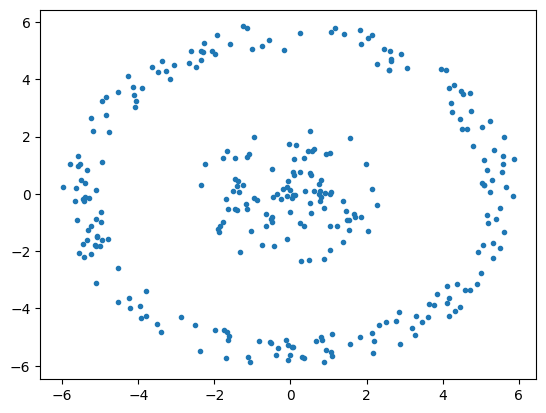

In [3]:
# Read datas

unarr_datas = []
with open('circle.txt', 'r') as in_file:
    raw_datas = in_file.readlines()
    for line in raw_datas:
        points = list(map(float, line.split()))
        unarr_datas.append(np.array([points[1], points[2]]))

datas = np.array(unarr_datas)
N = len(datas)

plt.scatter(datas[:, 0], datas[:, 1], marker='.')
plt.show

In [4]:
# Compute K, P, D matrices

euclidean_distance = lambda X, Y: np.linalg.norm(X - Y)

def gaussian_kernal(X, Y, sigma):
    distance = euclidean_distance(X, Y)
    result = np.exp(-distance ** 2 / sigma)
    return result

def get_k(points, sigma, t):
    K = []
    for i in range(N):
        row = [gaussian_kernal(datas[i], datas[j], sigma) for j in range(N)]
        K.append(np.array(row))

    A = np.eye(N)
    for _ in range(t): A = A.dot(K)
    return np.array(A)

def normalize_row(K):
    normalize = lambda row, sum: np.array(list(map(lambda x: x/sum, row)))
        
    P = [normalize(row, sum(row)) for row in K]
    return np.array(P)

def get_D(P):
    def compute_with_row(P, i, j):
        sum = 0
        for k in range(N):
            sum += (P[i][k] - P[j][k]) ** 2
        return sum
    
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            D[i][j] = compute_with_row(P, i, j)
        D[i] = np.array(D[i])
    return np.array(D)

# K = get_k(datas, 3, sigma=5)
# P = normalize_row(K)
# D = get_D(P)

In [11]:
# color with Diffusion Distance

def show_diffusion_distance(D, index, up_bound):
    center_point = np.array(datas[index])
    distances = D[index]
    
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(0, up_bound)
    colors = cmap(norm(distances))
    
    fig, ax = plt.subplots()
    
    scatter = ax.scatter(datas[:, 0], datas[:, 1], color=colors, s=25)
    
    ax.scatter(center_point[0], center_point[1], color='red', s=100, label='Center')
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Distance from Center')
    
    ax.set_title('Points Colored by Diffusion Distance')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    
    plt.show()

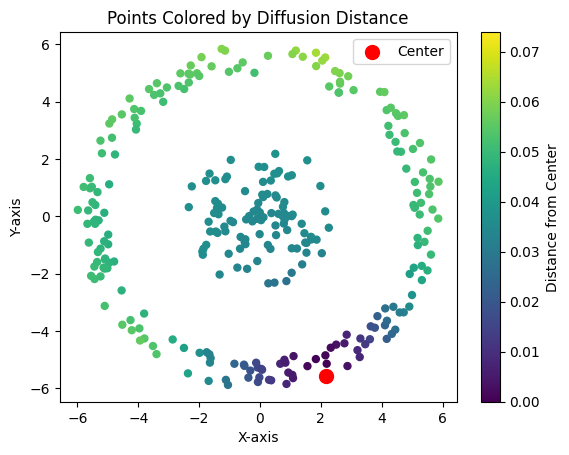

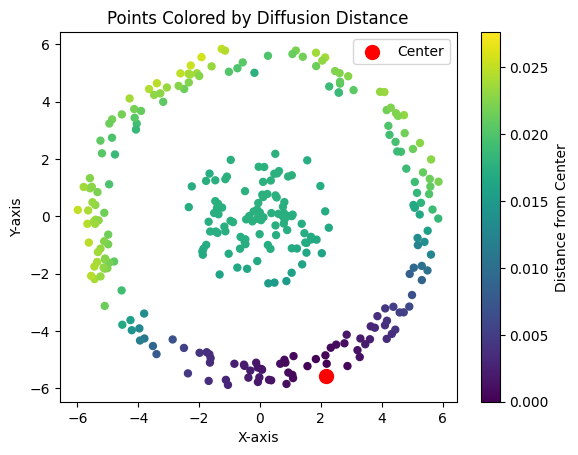

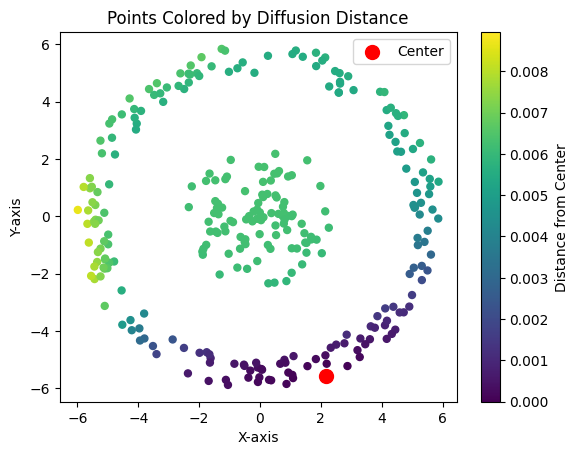

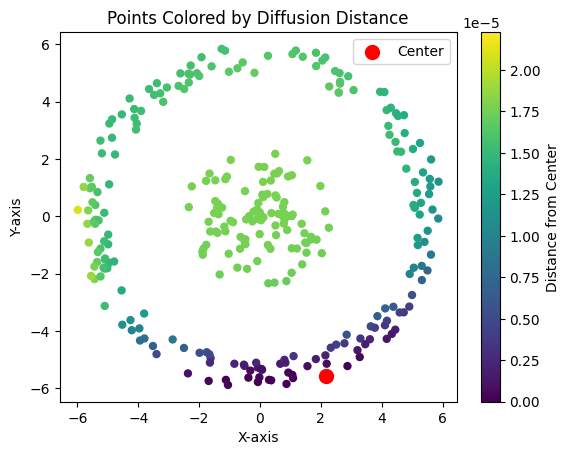

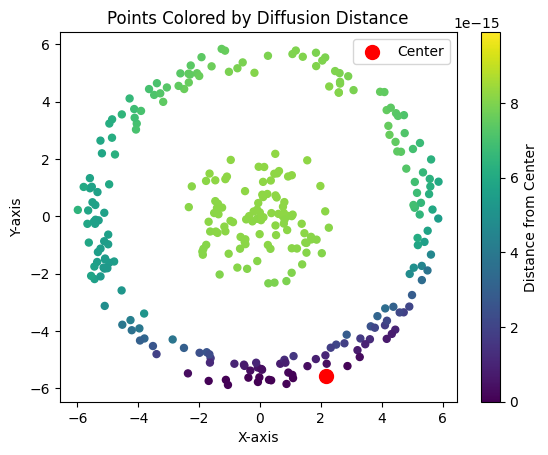

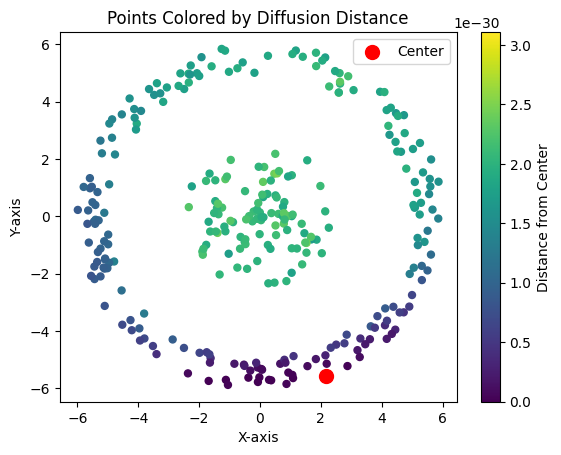

In [21]:
def test(index, sigma, t):
    K = get_k(datas, sigma=sigma, t=t)
    P = normalize_row(K)
    D = get_D(P)
    max_chance = np.array([D[i].max() for i in range(N)]).max()
    show_diffusion_distance(D, index, max_chance)

test(150, 5, 1)
test(150, 5, 3)
test(150, 5, 5)
test(150, 5, 10)
test(150, 5, 25)
test(150, 5, 50)